In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

rc('text', usetex=True)

from randnn import ContinuousNN, get_lyapunov_spectrum, get_attractor_dimension
from randnn.plotting import *

In [2]:
COUPLING_STRENGTH = 10
N_NEURONS = 1000

In [3]:
cont_nn = ContinuousNN(coupling_strength=COUPLING_STRENGTH, n_dofs=N_NEURONS, max_step=0.001)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/Users/Jesse/Projects/masters-thesis/code/randnn/randnn/plotting.py:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = patches.Circle((0, 0),


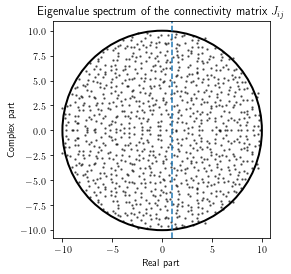

In [4]:
# Plot the eigenvalue spectrum and make sure it respects Girko's circular law
plot_random_matrix_spectrum(cont_nn.coupling_matrix, COUPLING_STRENGTH)

In [5]:
trajectory = cont_nn.run_or_load(n_steps=10000, n_burn_in=200)
cont_nn.save(trajectory)

Generating samples: 100%|██████████| 10000/10000 [00:09<00:00, 1095.84it/s]


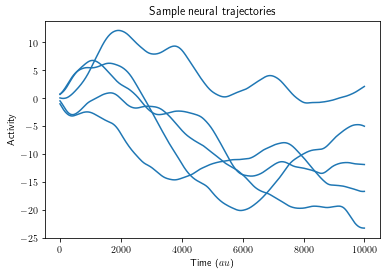

In [6]:
plot_trajectory_samples(trajectory, 5)

In [ ]:
lyapunov_spectrum = cont_nn.get_lyapunov_spectrum(trajectory)

Burning-in Osedelets matrix: 100it [00:08, 11.30it/s]
QR-Decomposition of trajectory: 598it [01:01,  6.40it/s]

In [ ]:
plot_lyapunov_spectrum(lyapunov_spectrum, title="Lyapunov spectrum of a random NN with $g={}$, $N={}$.".format(COUPLING_STRENGTH, N_NEURONS))

In [ ]:
print("Attractor dimension: " + get_attractor_dimension(lyapunov_spectrum))